Importing required Libraries

In [ ]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google


In [ ]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

Loading dataset

Dataset is available in tensorflow dataset repository

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)

Training Dataset has 60000 images & testing has 10000 images

In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)

Analyze the data

In [ ]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  96, 244, 251, 253,  62,   0,   0,   0,   0,
          0,   0],

In [ ]:
y_train[3]

1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(x_train[3])

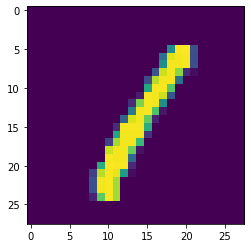

Reshaping the data

,As we are using Deep learning neural network, the input for this network to get trained on should be of higher dimensional. Our dataset is having three-dimensional images so we have to reshape them too higher dimensions

In [ ]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

Applying one hot encoding

One hot encoding to convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [ ]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
y_test[3]

In [ ]:
array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Add CNN Layers

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0667 - accuracy: 0.9801 - val_loss: 0.0696 - val_accuracy: 0.9788
Epoch 2/5
1875/1875 [==============================] - 241s 128ms/step - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0686 - val_accuracy: 0.9785
Epoch 3/5
1875/1875 [==============================] - 214s 114ms/step - loss: 0.0356 - accuracy: 0.9896 - val_loss: 0.0872 - val_accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.1150 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.1600 - val_accuracy: 0.9703


Observing the Metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.10003039240837097, 0.968999981880188]

Test the model

In [ ]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 65ms/step
[[1.3260176e-08 7.7986006e-13 3.6455315e-08 2.9610092e-07 1.5646798e-11
  1.3778896e-10 4.1263667e-13 9.9999964e-01 1.1379490e-07 2.1045294e-09]
 [2.1006859e-07 1.2594641e-07 9.9999034e-01 3.5162945e-08 4.3353143e-09
  9.1123662e-12 9.1517586e-06 3.2703376e-10 1.4321186e-07 3.1940206e-13]
 [2.4802778e-06 9.9979466e-01 1.4921059e-05 3.7803684e-07 8.7335298e-05
  2.8903003e-05 2.7718106e-05 1.2867370e-05 3.0750452e-05 2.2935906e-08]
 [9.9995744e-01 4.6908321e-11 3.4130477e-05 4.1088759e-09 8.1136318e-07
  5.7254068e-09 7.3323104e-06 9.4911625e-09 2.1464933e-07 4.6556575e-08]
 [3.2597340e-09 1.9132728e-11 2.1055206e-10 9.5630396e-12 1.0000000e+00
  4.2450727e-11 8.9529953e-11 1.0034685e-10 7.5573428e-12 1.3646383e-09]]

In [ ]:
import numpy as np

In [ ]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]

In [ ]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Save the Model

In [ ]:
model.save('models/mnistcnn.h5')

Test the saved model

inputs loaded from mnist

In [ ]:
print('X_train:' +str(X_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(X_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

X_train:(60000, 28, 28)
y_train:(60000, 10)
X_test:(10000, 28, 28)
y_test:(10000, 10)






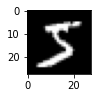

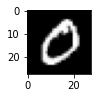

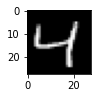

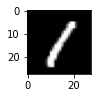

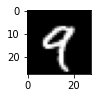

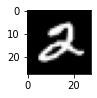

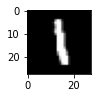

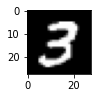

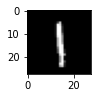

ouput predicted from saved model

inputs as hown are 5,0,4,1,9,2,1,3,1

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=X_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))

1/1 [==============================] - 0s 67ms/step
5
1/1 [==============================] - 0s 21ms/step
0
1/1 [==============================] - 0s 21ms/step
4
1/1 [==============================] - 0s 23ms/step
1
1/1 [==============================] - 0s 19ms/step
9
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 22ms/step
3
1/1 [==========================